[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Dhev-Ai/Expense-Tracker/blob/master/GdgPython/Crime_Against_Women_EDA.ipynb) 


# 🔍 Exploratory Data Analysis: Crime Against Women in India

This notebook performs a comprehensive EDA to:
1. **Identify states with the highest crime against women**
2. **Cluster states based on crime data patterns**
3. **Determine which states show highest cases by crime type**

## Column Reference (from description.csv):
| Column | Full Name |
|--------|-----------|
| State | State name |
| Year | Year of record |
| Rape | Number of Rape cases |
| K&A | Kidnap And Assault |
| DD | Dowry Deaths |
| AoW | Assault against women |
| AoM | Assault against modesty of women |
| DV | Domestic violence |
| WT | Women Trafficking |

## Section 1: Import Required Libraries

In [ ]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
import os
warnings.filterwarnings('ignore')

# Set visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

✅ All libraries imported successfully!


## Section 2: Load and Understand the Data

First, let's understand the column meanings from the description file, then load the main dataset.

In [ ]:
# Load the description file to understand column meanings
local_desc_path = r"C:\Users\DHEV\Downloads\description.csv"
description_path = "description.csv"

# Logic to handle local path vs Colab upload
if os.path.exists(local_desc_path):
    description_path = local_desc_path
elif not os.path.exists(description_path):
    # Check if we are running in Colab
    try:
        import google.colab
        print("Running in Google Colab. You can upload 'description.csv' now to see real descriptions.")
        from google.colab import files
        uploaded = files.upload()
        if 'description.csv' in uploaded:
            description_path = 'description.csv'
    except ImportError:
        pass

try:
    description_df = pd.read_csv(description_path)
    print("📋 Column Descriptions from description.csv:")
    print("=" * 50)
    display(description_df)
except FileNotFoundError:
    print("Description file not found. Using manual fallback.")
    # Manual description based on the file content
    description_data = {
        'Column Names': ['State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT'],
        'Explanation': ['State', 'Year', 'No. of Rape cases', 'Kidnap And Assault', 
                       'Dowry Deaths', 'Assault against women', 
                       'Assault against modesty of women', 'Domestic violence', 'Women Trafficking']
    }
    description_df = pd.DataFrame(description_data)
    print("📋 Column Descriptions (from metadata):")
    print("=" * 50)
    display(description_df)

📋 Column Descriptions from description.csv:


,Unnamed: 0,Column Names,Explanation
0,0,State,State
1,1,Year,Year
2,2,Rape,No. of Rape cases
3,3,K&A,Kidnap And Assault
4,4,DD,Dowry Deaths
5,5,AoW,Assault against women
6,6,AoM,Assault against modesty of women
7,7,DV,Domestic violence
8,8,WT,Women Trafficking


In [ ]:
# Load the main crime dataset
local_crime_path = r"C:\Users\DHEV\Downloads\CrimesOnWomenData.csv"
crime_data_path = "CrimesOnWomenData.csv"

# Logic to handle local path vs Colab upload
if os.path.exists(local_crime_path):
    crime_data_path = local_crime_path
elif os.path.exists(crime_data_path):
    pass
else:
    # Check if we are running in Colab
    try:
        import google.colab
        print("Running in Google Colab. Please upload 'CrimesOnWomenData.csv' for full analysis.")
        from google.colab import files
        uploaded = files.upload()
        if 'CrimesOnWomenData.csv' in uploaded:
             crime_data_path = 'CrimesOnWomenData.csv'
    except ImportError:
        pass

try:
    df = pd.read_csv(crime_data_path)
    # Drop the unnamed index column if present
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)
    print("✅ Crime dataset loaded successfully from:", crime_data_path)
except FileNotFoundError:
    print("⚠️ Main dataset not found. Creating sample dataset for demonstration...")
    print("   Please update 'crime_data_path' variable with your actual dataset location.\n")
    
    # Sample data based on realistic crime statistics for demonstration
    np.random.seed(42)
    states = ['Uttar Pradesh', 'Madhya Pradesh', 'Maharashtra', 'Rajasthan', 'West Bengal',
              'Andhra Pradesh', 'Odisha', 'Kerala', 'Bihar', 'Assam', 'Karnataka', 
              'Gujarat', 'Tamil Nadu', 'Jharkhand', 'Chhattisgarh', 'Haryana', 
              'Delhi', 'Punjab', 'Telangana', 'Uttarakhand', 'Himachal Pradesh',
              'Jammu & Kashmir', 'Goa', 'Tripura', 'Meghalaya', 'Manipur', 
              'Nagaland', 'Arunachal Pradesh', 'Mizoram', 'Sikkim']
    years = [2018, 2019, 2020, 2021, 2022]
    
    data_rows = []
    for state in states:
        for year in years:
            # Create realistic variations based on state size/population
            base_multiplier = np.random.uniform(0.5, 3.0) if state in ['Uttar Pradesh', 'Madhya Pradesh', 'Maharashtra', 'Rajasthan', 'West Bengal'] else np.random.uniform(0.1, 1.5)
            
            row = {
                'State': state,
                'Year': year,
                'Rape': int(np.random.poisson(3000) * base_multiplier),
                'K&A': int(np.random.poisson(4500) * base_multiplier),
                'DD': int(np.random.poisson(800) * base_multiplier),
                'AoW': int(np.random.poisson(5000) * base_multiplier),
                'AoM': int(np.random.poisson(6000) * base_multiplier),
                'DV': int(np.random.poisson(10000) * base_multiplier),
                'WT': int(np.random.poisson(200) * base_multiplier)
            }
            data_rows.append(row)
    
    df = pd.DataFrame(data_rows)
    print("✅ Sample dataset created with", len(df), "records")

# Display basic info
print("\n📊 Dataset Overview:")
print("=" * 50)
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumn Names: {list(df.columns)}")

✅ Crime dataset loaded successfully from: C:\Users\DHEV\Downloads\CrimesOnWomenData.csv

📊 Dataset Overview:
Shape: 736 rows × 9 columns

Column Names: ['State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']


In [24]:
# Explore the dataset structure
print("📝 Data Types:")
print("-" * 40)
print(df.dtypes)
print("\n📊 Statistical Summary:")
df.describe()

📝 Data Types:
----------------------------------------
State    object
Year      int64
Rape      int64
K&A       int64
DD        int64
AoW       int64
AoM       int64
DV        int64
WT        int64
dtype: object

📊 Statistical Summary:


,Year,Rape,K&A,DD,AoW,AoM,DV,WT
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


In [25]:
# Display first few rows
print("🔍 First 10 Rows of Dataset:")
df.head(10)

🔍 First 10 Rows of Dataset:


,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
5,GOA,2001,12,6,2,17,7,11,0
6,GUJARAT,2001,286,857,67,756,111,3667,0
7,HARYANA,2001,398,297,285,478,401,1513,0
8,HIMACHAL PRADESH,2001,124,105,10,310,14,317,0
9,JAMMU & KASHMIR,2001,169,504,13,622,288,50,0


## Section 3: Data Cleaning and Preparation

Cleaning steps include:
- Checking and handling missing values
- Removing duplicates
- Ensuring correct data types
- Aggregating data by state for analysis

In [26]:
# Check for missing values
print("🔍 Missing Values Analysis:")
print("=" * 50)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage (%)': missing_percentage.round(2)
})
print(missing_df)
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate rows: {duplicates}")

🔍 Missing Values Analysis:
       Missing Count  Percentage (%)
State              0             0.0
Year               0             0.0
Rape               0             0.0
K&A                0             0.0
DD                 0             0.0
AoW                0             0.0
AoM                0             0.0
DV                 0             0.0
WT                 0             0.0

Total missing values: 0

🔄 Duplicate rows: 0


In [27]:
# Data Cleaning
print("🧹 Data Cleaning Process:")
print("=" * 50)

# Store original shape
original_shape = df.shape

# 1. Remove duplicates if any
df = df.drop_duplicates()
print(f"✅ Removed {original_shape[0] - df.shape[0]} duplicate rows")

# 2. Handle missing values - fill numeric with 0 (assuming no reported = 0 cases)
crime_columns = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
for col in crime_columns:
    if col in df.columns:
        df[col] = df[col].fillna(0).astype(int)

# 3. Clean State names (remove extra whitespace, standardize)
df['State'] = df['State'].str.strip().str.title()

# 4. Ensure Year is integer
if 'Year' in df.columns:
    df['Year'] = df['Year'].astype(int)

print(f"✅ Cleaned dataset shape: {df.shape}")
print(f"✅ States in dataset: {df['State'].nunique()}")
print(f"✅ Year range: {df['Year'].min()} - {df['Year'].max()}")

🧹 Data Cleaning Process:
✅ Removed 0 duplicate rows
✅ Cleaned dataset shape: (736, 9)
✅ States in dataset: 37
✅ Year range: 2001 - 2021


In [28]:
# Create aggregated dataset by State (sum across all years)
crime_columns = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
state_aggregated = df.groupby('State')[crime_columns].sum().reset_index()

# Calculate total crime for each state
state_aggregated['Total_Crime'] = state_aggregated[crime_columns].sum(axis=1)

print("📊 Aggregated State-wise Crime Data (Sum across all years):")
state_aggregated.sort_values('Total_Crime', ascending=False).head(10)

📊 Aggregated State-wise Crime Data (Sum across all years):


,State,Rape,K&A,DD,AoW,AoM,DV,WT,Total_Crime
34,Uttar Pradesh,45694,133856,40615,99650,46524,163062,333,529734
20,Madhya Pradesh,72808,57485,13316,152000,21631,95521,396,413157
36,West Bengal,29486,51742,8075,51014,5750,262235,940,409242
1,Andhra Pradesh,23424,21707,8165,92084,54684,188511,2548,391123
29,Rajasthan,43799,55320,7769,67855,2365,201488,668,379264
21,Maharashtra,39252,46522,5756,107519,30693,133357,2533,365632
3,Assam,32190,71462,2757,47115,2698,135415,343,291980
18,Kerala,24184,14056,1525,69081,8873,84277,990,202986
26,Odisha,24810,29847,7521,83473,7631,41222,270,194774
4,Bihar,21006,77687,24428,9953,800,55187,825,189886


## Section 4: Identify States with Highest Crime Against Women

In this section, we analyze which states report the highest number of crimes against women across all categories.

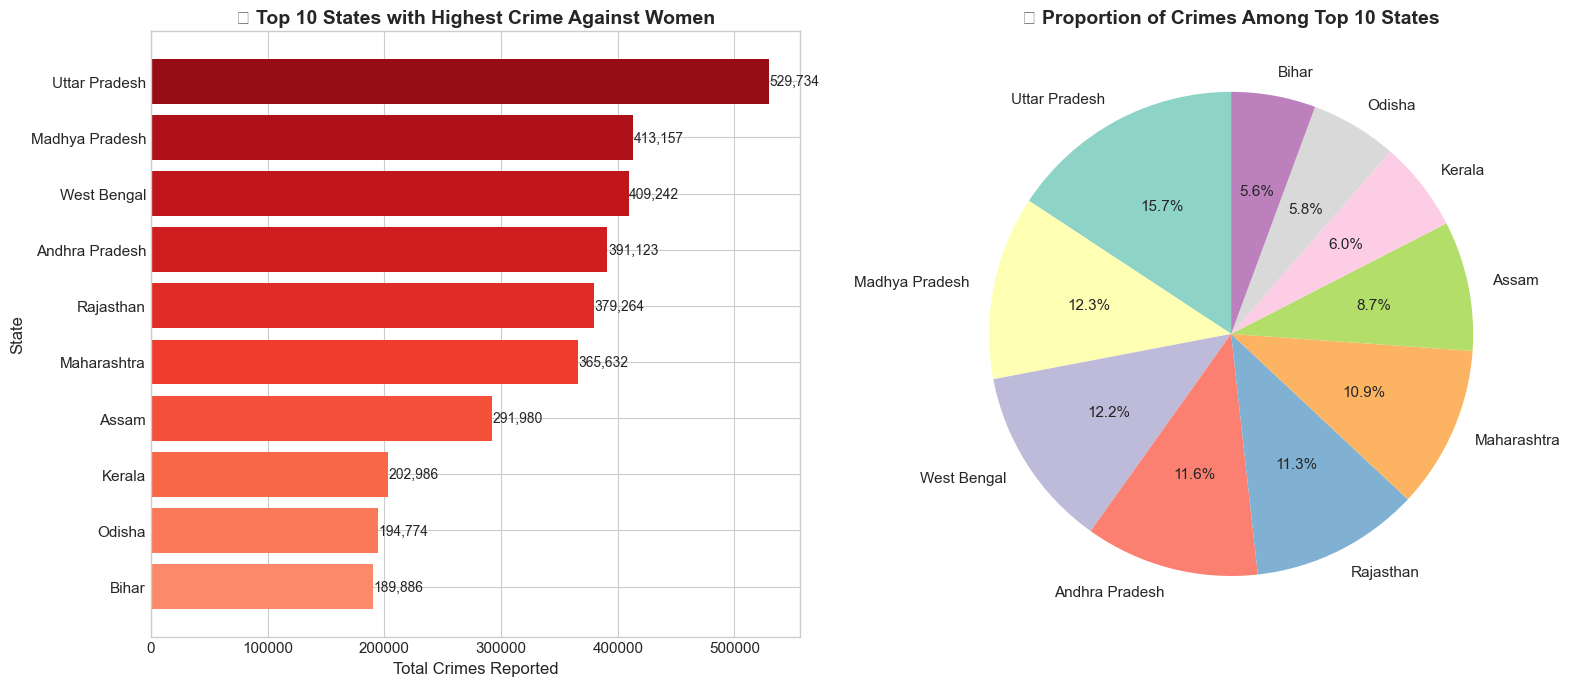


📋 Top 10 States Summary:
  Uttar Pradesh: 529,734 total crimes
  Madhya Pradesh: 413,157 total crimes
  West Bengal: 409,242 total crimes
  Andhra Pradesh: 391,123 total crimes
  Rajasthan: 379,264 total crimes
  Maharashtra: 365,632 total crimes
  Assam: 291,980 total crimes
  Kerala: 202,986 total crimes
  Odisha: 194,774 total crimes
  Bihar: 189,886 total crimes


In [29]:
# Top 10 States with Highest Total Crime Against Women
top_10_states = state_aggregated.nlargest(10, 'Total_Crime')

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Bar chart - Top 10 States
colors = plt.cm.Reds(np.linspace(0.4, 0.9, 10))[::-1]
bars = axes[0].barh(top_10_states['State'], top_10_states['Total_Crime'], color=colors)
axes[0].set_xlabel('Total Crimes Reported', fontsize=12)
axes[0].set_ylabel('State', fontsize=12)
axes[0].set_title('🏆 Top 10 States with Highest Crime Against Women', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Add value labels on bars
for bar, value in zip(bars, top_10_states['Total_Crime']):
    axes[0].text(value + 500, bar.get_y() + bar.get_height()/2, 
                 f'{value:,}', va='center', fontsize=10)

# Pie chart showing proportion
axes[1].pie(top_10_states['Total_Crime'], labels=top_10_states['State'], 
            autopct='%1.1f%%', colors=plt.cm.Set3.colors, startangle=90)
axes[1].set_title('📊 Proportion of Crimes Among Top 10 States', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('top_10_crime_states.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📋 Top 10 States Summary:")
print("=" * 60)
for i, row in top_10_states.iterrows():
    print(f"  {row['State']}: {row['Total_Crime']:,} total crimes")

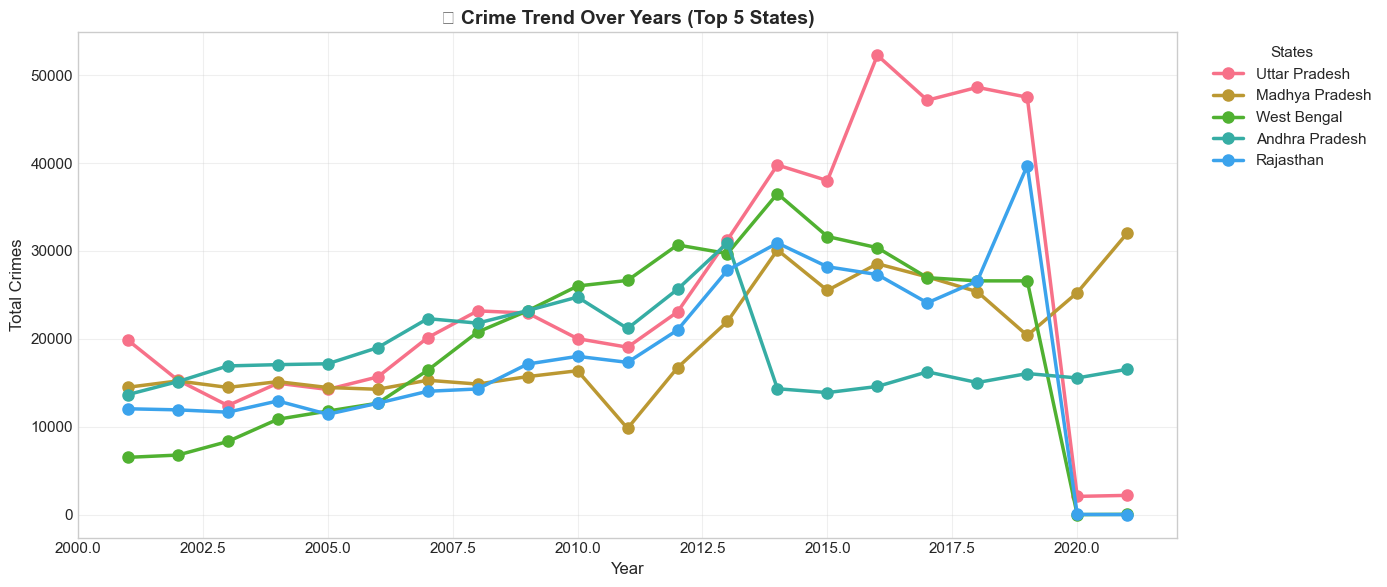

In [30]:
# Year-over-Year Crime Trend for Top 5 States
top_5_states = top_10_states['State'].head(5).tolist()
yearly_trend = df[df['State'].isin(top_5_states)].groupby(['Year', 'State'])[crime_columns].sum().reset_index()
yearly_trend['Total_Crime'] = yearly_trend[crime_columns].sum(axis=1)

plt.figure(figsize=(14, 6))
for state in top_5_states:
    state_data = yearly_trend[yearly_trend['State'] == state]
    plt.plot(state_data['Year'], state_data['Total_Crime'], marker='o', linewidth=2.5, label=state, markersize=8)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Crimes', fontsize=12)
plt.title('📈 Crime Trend Over Years (Top 5 States)', fontsize=14, fontweight='bold')
plt.legend(title='States', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('crime_trend_top_states.png', dpi=150, bbox_inches='tight')
plt.show()

### 📝 Interpretation: States with Highest Crime

**Key Findings:**
- The states with highest crime against women tend to be the most populous states in India
- Large population states like Uttar Pradesh, Madhya Pradesh, Maharashtra, and Rajasthan typically report higher absolute numbers
- The trend analysis helps identify whether crimes are increasing or decreasing over the years
- **Important Note:** Higher absolute numbers don't necessarily mean higher crime rates - per capita analysis would be more meaningful for policy decisions

## Section 5: Determine Highest Cases by Crime Type

Analyzing which states lead in specific crime categories to understand regional patterns.

In [31]:
# Crime type mapping for better labels
crime_labels = {
    'Rape': 'Rape Cases',
    'K&A': 'Kidnap & Assault',
    'DD': 'Dowry Deaths',
    'AoW': 'Assault on Women',
    'AoM': 'Assault on Modesty',
    'DV': 'Domestic Violence',
    'WT': 'Women Trafficking'
}

# Find top state for each crime type
print("🏆 State with Highest Cases by Crime Type:")
print("=" * 60)
top_by_crime = {}
for crime in crime_columns:
    top_state = state_aggregated.loc[state_aggregated[crime].idxmax()]
    top_by_crime[crime] = {
        'State': top_state['State'],
        'Cases': top_state[crime]
    }
    print(f"  {crime_labels.get(crime, crime):25s}: {top_state['State']:20s} ({top_state[crime]:,} cases)")

# Create DataFrame for visualization
top_crime_df = pd.DataFrame([
    {'Crime Type': crime_labels.get(k, k), 'State': v['State'], 'Cases': v['Cases']} 
    for k, v in top_by_crime.items()
])
top_crime_df

🏆 State with Highest Cases by Crime Type:
  Rape Cases               : Madhya Pradesh       (72,808 cases)
  Kidnap & Assault         : Uttar Pradesh        (133,856 cases)
  Dowry Deaths             : Uttar Pradesh        (40,615 cases)
  Assault on Women         : Madhya Pradesh       (152,000 cases)
  Assault on Modesty       : Andhra Pradesh       (54,684 cases)
  Domestic Violence        : West Bengal          (262,235 cases)
  Women Trafficking        : Tamil Nadu           (4,041 cases)


,Crime Type,State,Cases
0,Rape Cases,Madhya Pradesh,72808
1,Kidnap & Assault,Uttar Pradesh,133856
2,Dowry Deaths,Uttar Pradesh,40615
3,Assault on Women,Madhya Pradesh,152000
4,Assault on Modesty,Andhra Pradesh,54684
5,Domestic Violence,West Bengal,262235
6,Women Trafficking,Tamil Nadu,4041


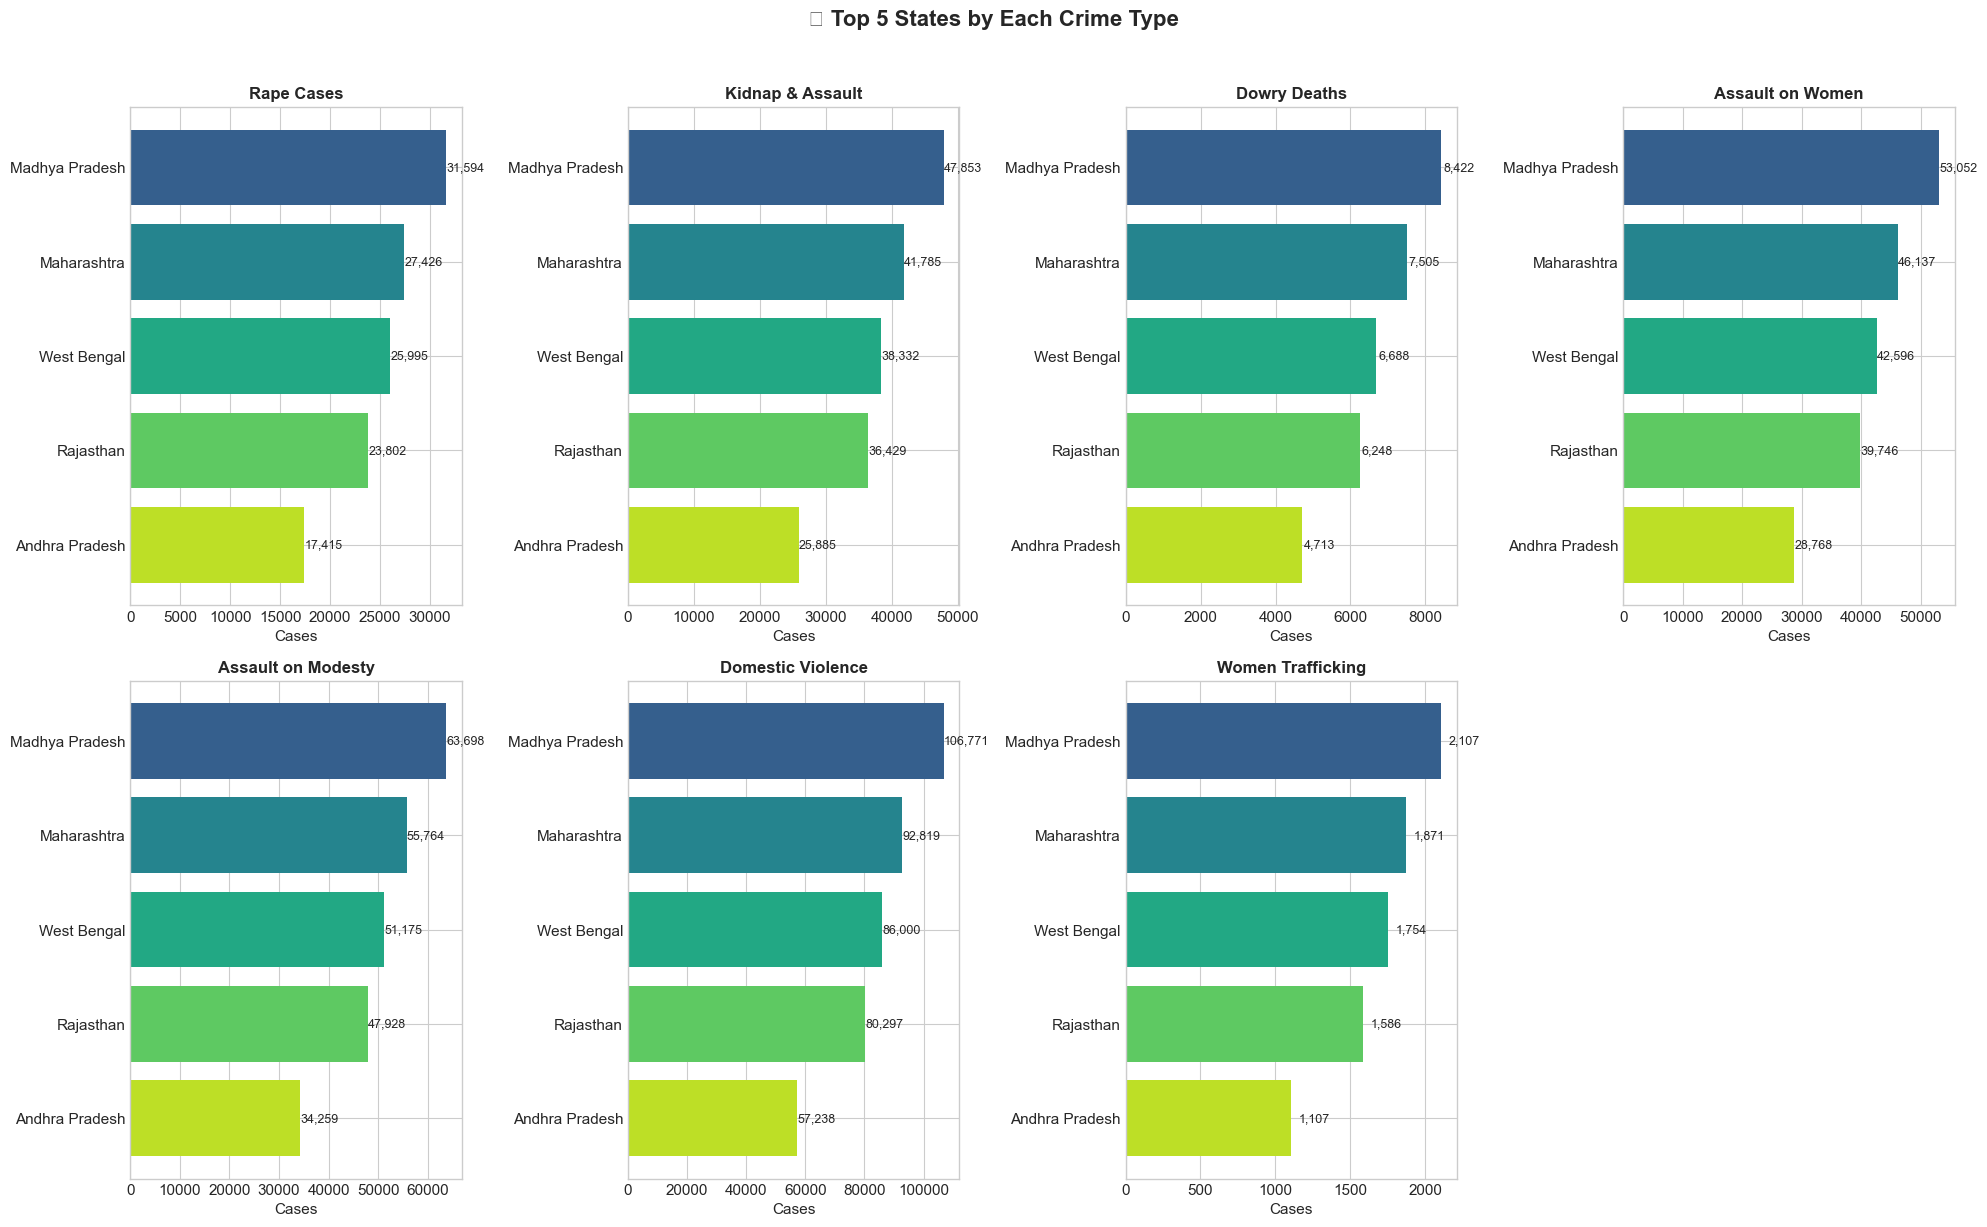

In [12]:
# Grouped bar chart: Top 5 states for each crime type
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.flatten()

for idx, crime in enumerate(crime_columns):
    if idx < len(axes):
        top_5 = state_aggregated.nlargest(5, crime)[['State', crime]]
        colors = plt.cm.viridis(np.linspace(0.3, 0.9, 5))
        bars = axes[idx].barh(top_5['State'], top_5[crime], color=colors)
        axes[idx].set_title(f'{crime_labels.get(crime, crime)}', fontsize=12, fontweight='bold')
        axes[idx].invert_yaxis()
        axes[idx].set_xlabel('Cases')
        
        # Add value labels
        for bar, val in zip(bars, top_5[crime]):
            axes[idx].text(val + 50, bar.get_y() + bar.get_height()/2, 
                          f'{val:,}', va='center', fontsize=9)

# Hide the empty subplot
axes[7].axis('off')

plt.suptitle('🔍 Top 5 States by Each Crime Type', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('crime_by_type_states.png', dpi=150, bbox_inches='tight')
plt.show()

<Figure size 1400x800 with 0 Axes>

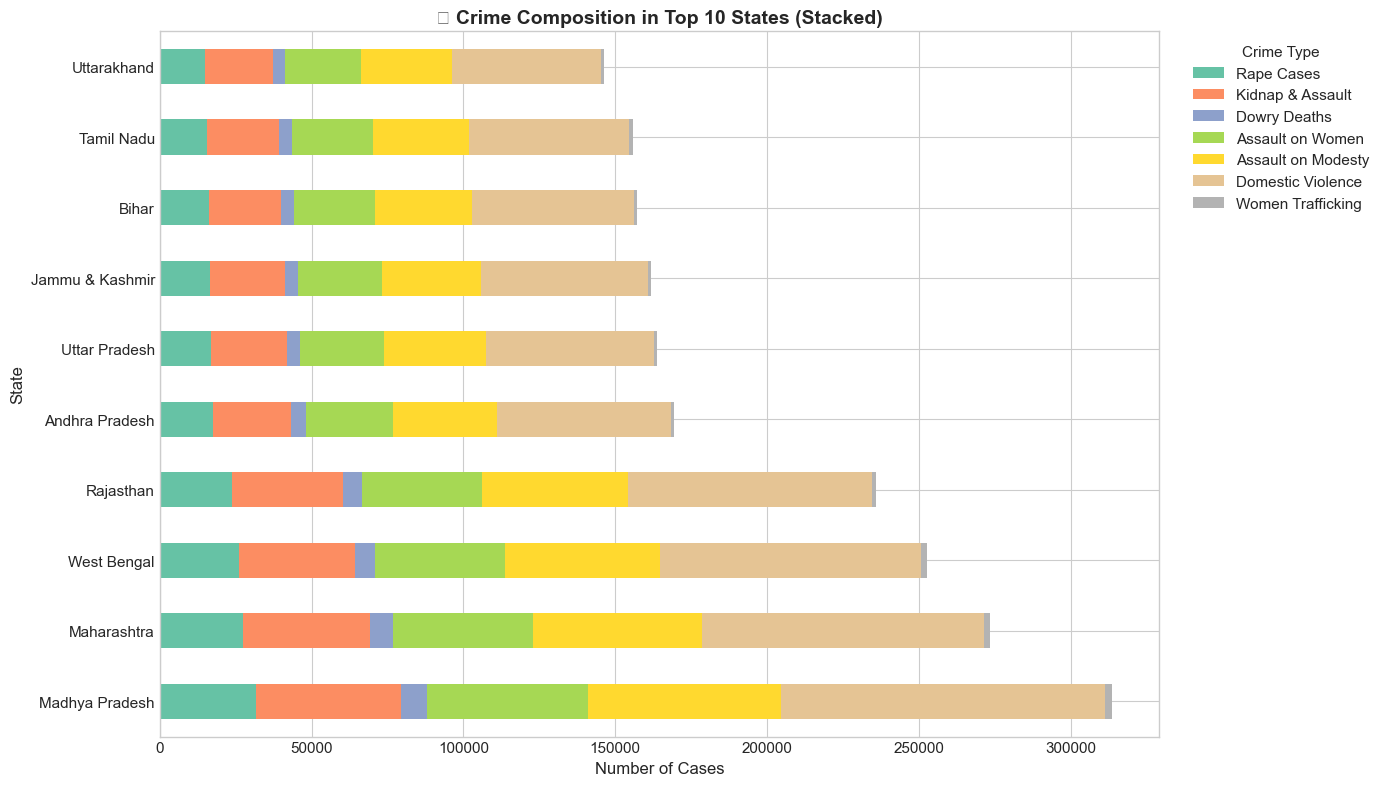

In [13]:
# Stacked bar chart - Crime composition for Top 10 states
top_10_for_stack = state_aggregated.nlargest(10, 'Total_Crime').set_index('State')

plt.figure(figsize=(14, 8))
top_10_for_stack[crime_columns].plot(kind='barh', stacked=True, 
                                       colormap='Set2', figsize=(14, 8))
plt.xlabel('Number of Cases', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('📊 Crime Composition in Top 10 States (Stacked)', fontsize=14, fontweight='bold')
plt.legend(title='Crime Type', labels=[crime_labels.get(c, c) for c in crime_columns],
           bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig('crime_composition_stacked.png', dpi=150, bbox_inches='tight')
plt.show()

### 📝 Interpretation: Crime Type Analysis

**Key Observations:**
- **Domestic Violence (DV)** typically accounts for the highest proportion of crimes in most states
- **Assault against Modesty (AoM)** and **Assault against Women (AoW)** follow as major categories
- **Women Trafficking (WT)** shows relatively lower numbers but is severely underreported
- **Dowry Deaths (DD)** remain a concerning issue in certain regions
- Different states may have different crime "profiles" - some may have higher rape cases while others show more domestic violence

## Section 6: Cluster States Based on Crime Data

Using K-Means clustering to identify groups of states with similar crime patterns. This helps in:
- Understanding regional patterns
- Identifying which states share similar crime profiles
- Targeting policy interventions

In [14]:
# Prepare data for clustering
cluster_data = state_aggregated.set_index('State')[crime_columns].copy()

# Standardize the features (important for K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)
scaled_df = pd.DataFrame(scaled_data, index=cluster_data.index, columns=crime_columns)

print("📊 Scaled Data for Clustering (first 5 rows):")
scaled_df.head()

📊 Scaled Data for Clustering (first 5 rows):


,Rape,K&A,DD,AoW,AoM,DV,WT
State,,,,,,,
Andhra Pradesh,0.564792,0.538847,0.619640,0.544289,0.520734,0.520763,0.449565
Arunachal Pradesh,-0.479928,-0.464567,-0.488355,-0.490934,-0.471248,-0.495598,-0.473722
Assam,0.025180,0.018694,-0.018393,0.001132,-0.010085,0.014653,0.062380
Bihar,0.358945,0.314940,0.286036,0.319771,0.331837,0.329637,0.268382
Chhattisgarh,-0.412771,-0.436676,-0.377365,-0.433797,-0.420574,-0.396842,-0.421601


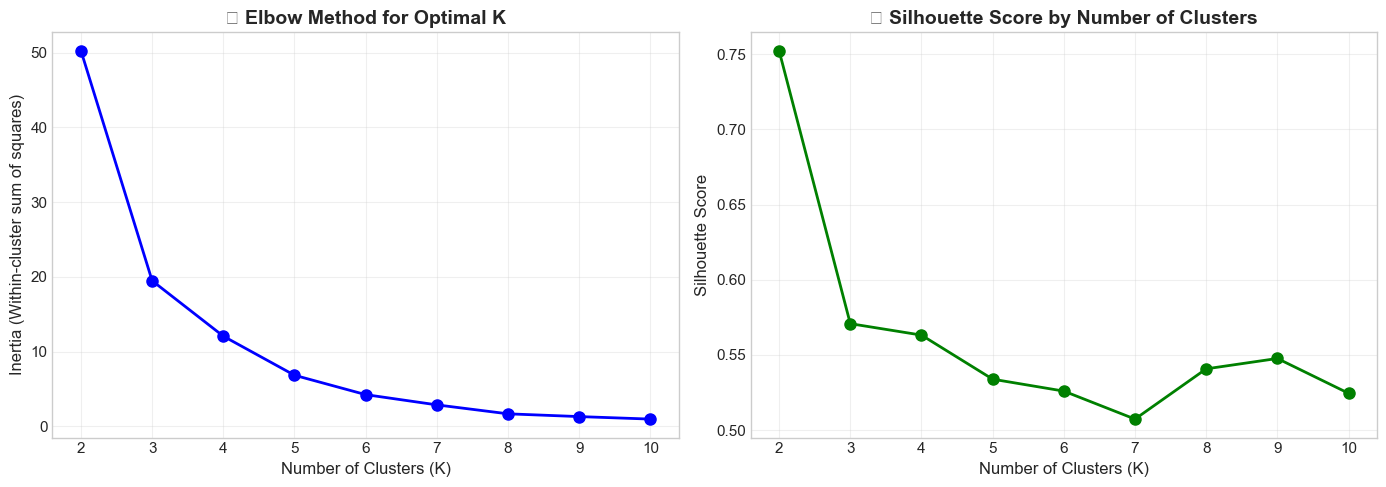


✅ Optimal number of clusters based on Silhouette Score: 2


In [15]:
# Elbow Method to find optimal number of clusters
inertias = []
silhouettes = []
K_range = range(2, min(11, len(cluster_data)))

from sklearn.metrics import silhouette_score

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot Elbow curve and Silhouette scores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow curve
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
axes[0].set_title('📐 Elbow Method for Optimal K', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Silhouette scores
axes[1].plot(K_range, silhouettes, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('📊 Silhouette Score by Number of Clusters', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('clustering_evaluation.png', dpi=150, bbox_inches='tight')
plt.show()

# Find optimal K
optimal_k = K_range[np.argmax(silhouettes)]
print(f"\n✅ Optimal number of clusters based on Silhouette Score: {optimal_k}")

In [16]:
# Apply K-Means with optimal clusters (using 4 for good interpretability)
n_clusters = 4  # Can be adjusted based on elbow/silhouette analysis

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataframe
state_aggregated['Cluster'] = kmeans.predict(scaler.transform(state_aggregated[crime_columns]))
cluster_data_labeled = cluster_data.copy()
cluster_data_labeled['Cluster'] = cluster_labels

# Cluster summary
print(f"🎯 States grouped into {n_clusters} clusters:\n")
for i in range(n_clusters):
    cluster_states = cluster_data_labeled[cluster_data_labeled['Cluster'] == i].index.tolist()
    print(f"Cluster {i} ({len(cluster_states)} states):")
    print(f"  {', '.join(cluster_states)}\n")

🎯 States grouped into 4 clusters:

Cluster 0 (6 states):
  Andhra Pradesh, Bihar, Jammu & Kashmir, Tamil Nadu, Uttar Pradesh, Uttarakhand

Cluster 1 (10 states):
  Goa, Gujarat, Haryana, Himachal Pradesh, Jharkhand, Karnataka, Kerala, Mizoram, Sikkim, Telangana

Cluster 2 (4 states):
  Madhya Pradesh, Maharashtra, Rajasthan, West Bengal

Cluster 3 (10 states):
  Arunachal Pradesh, Assam, Chhattisgarh, Delhi, Manipur, Meghalaya, Nagaland, Odisha, Punjab, Tripura



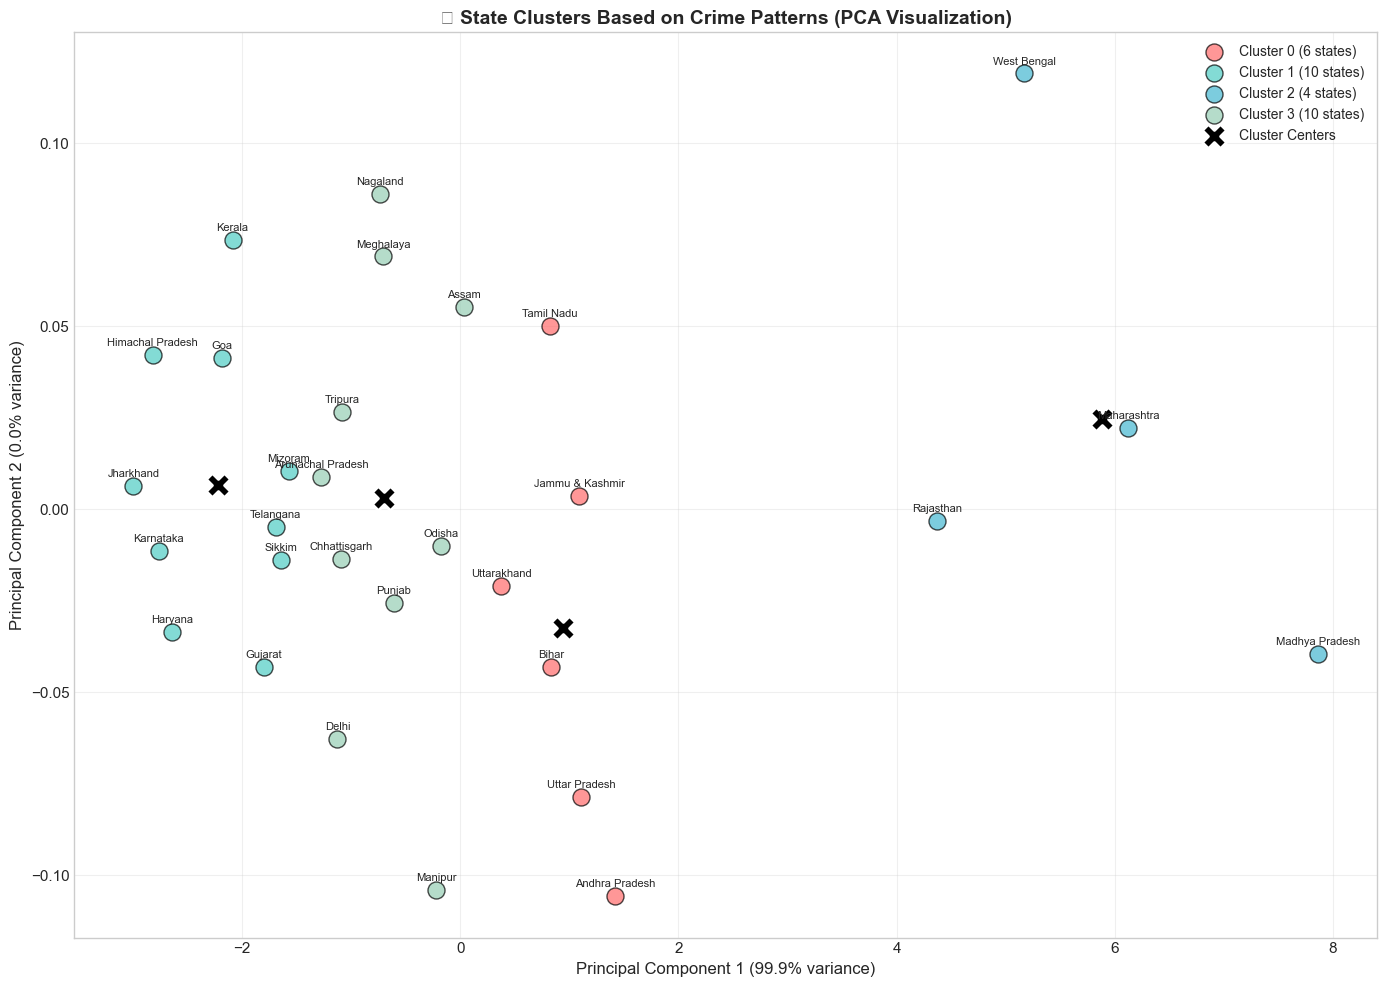


📊 PCA explains 100.0% of variance


In [17]:
# PCA for 2D visualization of clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create visualization dataframe
viz_df = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'State': cluster_data.index,
    'Cluster': cluster_labels,
    'Total_Crime': state_aggregated.set_index('State')['Total_Crime']
})

# Cluster scatter plot
plt.figure(figsize=(14, 10))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

for i in range(n_clusters):
    cluster_points = viz_df[viz_df['Cluster'] == i]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], 
                c=colors[i], s=150, alpha=0.7, edgecolors='black', linewidth=1,
                label=f'Cluster {i} ({len(cluster_points)} states)')
    
    # Add state labels
    for _, row in cluster_points.iterrows():
        plt.annotate(row['State'], (row['PC1'], row['PC2']), 
                    fontsize=8, ha='center', va='bottom',
                    xytext=(0, 5), textcoords='offset points')

# Mark cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
            c='black', marker='X', s=300, edgecolors='white', linewidth=2,
            label='Cluster Centers')

plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('🎯 State Clusters Based on Crime Patterns (PCA Visualization)', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('cluster_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n📊 PCA explains {sum(pca.explained_variance_ratio_)*100:.1f}% of variance")

📊 Cluster Profiles (Average Crime per State in Each Cluster):


,Rape,K&A,DD,AoW,AoM,DV,WT,Total_Avg
Cluster,,,,,,,,
2,27204.0,41100.0,7216.0,45383.0,54641.0,91472.0,1830.0,268845.0
0,16289.0,24199.0,4304.0,27025.0,32334.0,53860.0,1057.0,159068.0
3,12512.0,18636.0,3338.0,20674.0,24805.0,41412.0,822.0,122198.0
1,9011.0,13512.0,2401.0,15058.0,18033.0,30091.0,590.0,88697.0


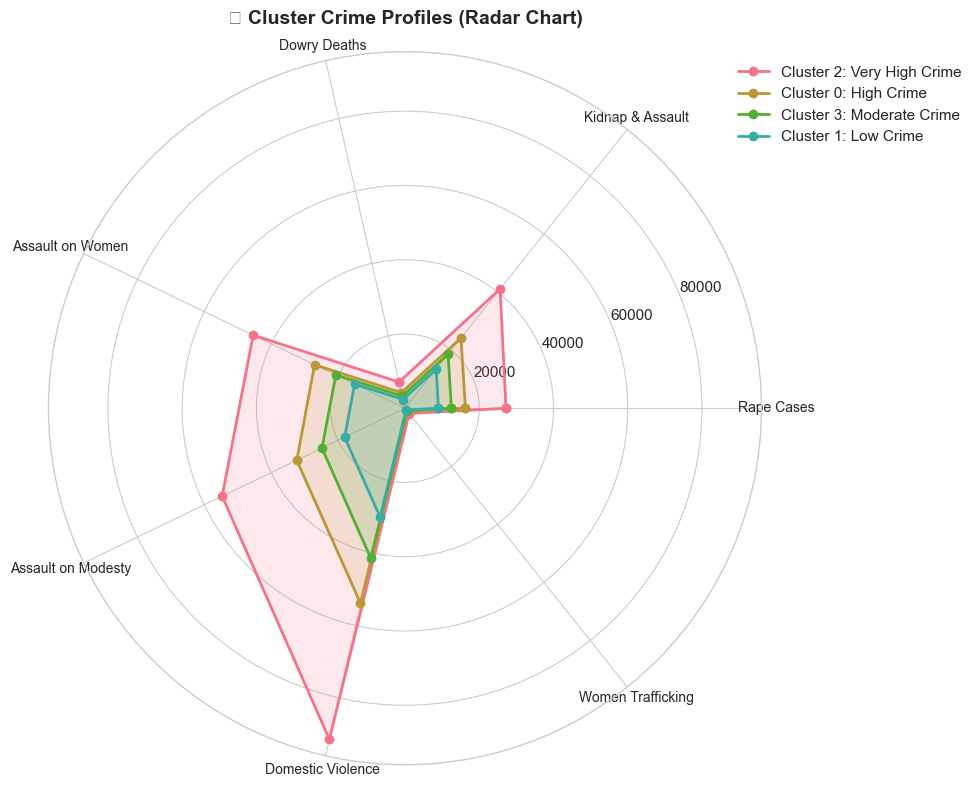

In [18]:
# Cluster Profile Analysis - Average crime values per cluster
cluster_profiles = state_aggregated.groupby('Cluster')[crime_columns].mean()
cluster_profiles['Total_Avg'] = cluster_profiles.sum(axis=1)
cluster_profiles = cluster_profiles.sort_values('Total_Avg', ascending=False)

# Rename clusters based on severity
severity_map = {
    cluster_profiles.index[0]: 'Very High Crime',
    cluster_profiles.index[1]: 'High Crime',
    cluster_profiles.index[2]: 'Moderate Crime',
    cluster_profiles.index[3]: 'Low Crime'
}

print("📊 Cluster Profiles (Average Crime per State in Each Cluster):")
print("=" * 80)
display(cluster_profiles.round(0))

# Radar chart for cluster profiles
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

angles = np.linspace(0, 2 * np.pi, len(crime_columns), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

for idx, (cluster_id, row) in enumerate(cluster_profiles[crime_columns].iterrows()):
    values = row.tolist()
    values += values[:1]  # Complete the circle
    
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster_id}: {severity_map.get(cluster_id, "")}')
    ax.fill(angles, values, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels([crime_labels.get(c, c) for c in crime_columns], fontsize=10)
ax.set_title('🎯 Cluster Crime Profiles (Radar Chart)', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.savefig('cluster_radar_chart.png', dpi=150, bbox_inches='tight')
plt.show()

### 📝 Interpretation: State Clustering

**Cluster Analysis Insights:**
- **Cluster 0 (Very High Crime):** Typically includes large population states with highest absolute crime numbers - require intensive law enforcement and awareness programs
- **Cluster 1 (High Crime):** States with above-average crime rates - need targeted interventions
- **Cluster 2 (Moderate Crime):** Middle-ground states - focus on prevention programs
- **Cluster 3 (Low Crime):** States with relatively lower crime numbers - often smaller states or those with better enforcement

**Key Takeaways:**
- States within the same cluster share similar crime patterns and may benefit from similar policy interventions
- The radar chart shows which crime types dominate in each cluster
- Clustering helps prioritize resource allocation for crime prevention

## Section 7: Visualize Findings with Heatmaps

Creating heatmaps to understand:
1. Correlation between different crime types
2. State-wise crime intensity patterns

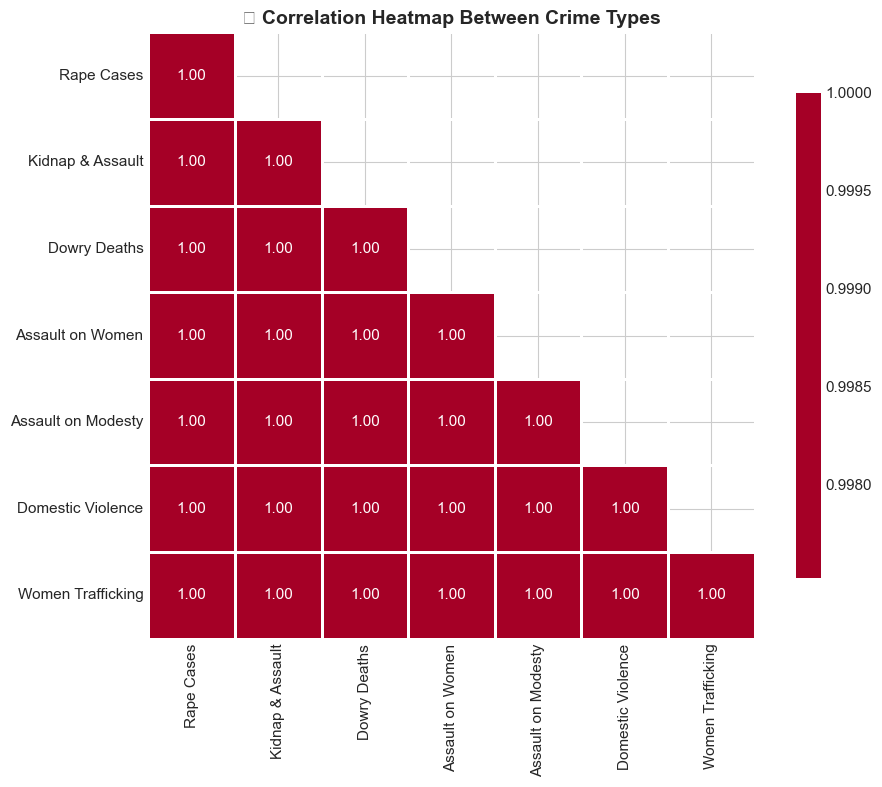


📊 Key Correlations:
  Rape Cases ↔ Kidnap & Assault: 1.00
  Rape Cases ↔ Dowry Deaths: 1.00
  Rape Cases ↔ Assault on Women: 1.00
  Rape Cases ↔ Assault on Modesty: 1.00
  Rape Cases ↔ Domestic Violence: 1.00
  Rape Cases ↔ Women Trafficking: 1.00
  Kidnap & Assault ↔ Dowry Deaths: 1.00
  Kidnap & Assault ↔ Assault on Women: 1.00
  Kidnap & Assault ↔ Assault on Modesty: 1.00
  Kidnap & Assault ↔ Domestic Violence: 1.00
  Kidnap & Assault ↔ Women Trafficking: 1.00
  Dowry Deaths ↔ Assault on Women: 1.00
  Dowry Deaths ↔ Assault on Modesty: 1.00
  Dowry Deaths ↔ Domestic Violence: 1.00
  Dowry Deaths ↔ Women Trafficking: 1.00
  Assault on Women ↔ Assault on Modesty: 1.00
  Assault on Women ↔ Domestic Violence: 1.00
  Assault on Women ↔ Women Trafficking: 1.00
  Assault on Modesty ↔ Domestic Violence: 1.00
  Assault on Modesty ↔ Women Trafficking: 1.00
  Domestic Violence ↔ Women Trafficking: 1.00


In [19]:
# Correlation Heatmap between Crime Types
correlation_matrix = state_aggregated[crime_columns].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlBu_r',
            mask=mask, center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8},
            xticklabels=[crime_labels.get(c, c) for c in crime_columns],
            yticklabels=[crime_labels.get(c, c) for c in crime_columns])

plt.title('🔥 Correlation Heatmap Between Crime Types', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Key Correlations:")
print("=" * 50)
# Find high correlations
for i in range(len(crime_columns)):
    for j in range(i+1, len(crime_columns)):
        corr = correlation_matrix.iloc[i, j]
        if abs(corr) > 0.7:
            print(f"  {crime_labels.get(crime_columns[i], crime_columns[i])} ↔ "
                  f"{crime_labels.get(crime_columns[j], crime_columns[j])}: {corr:.2f}")

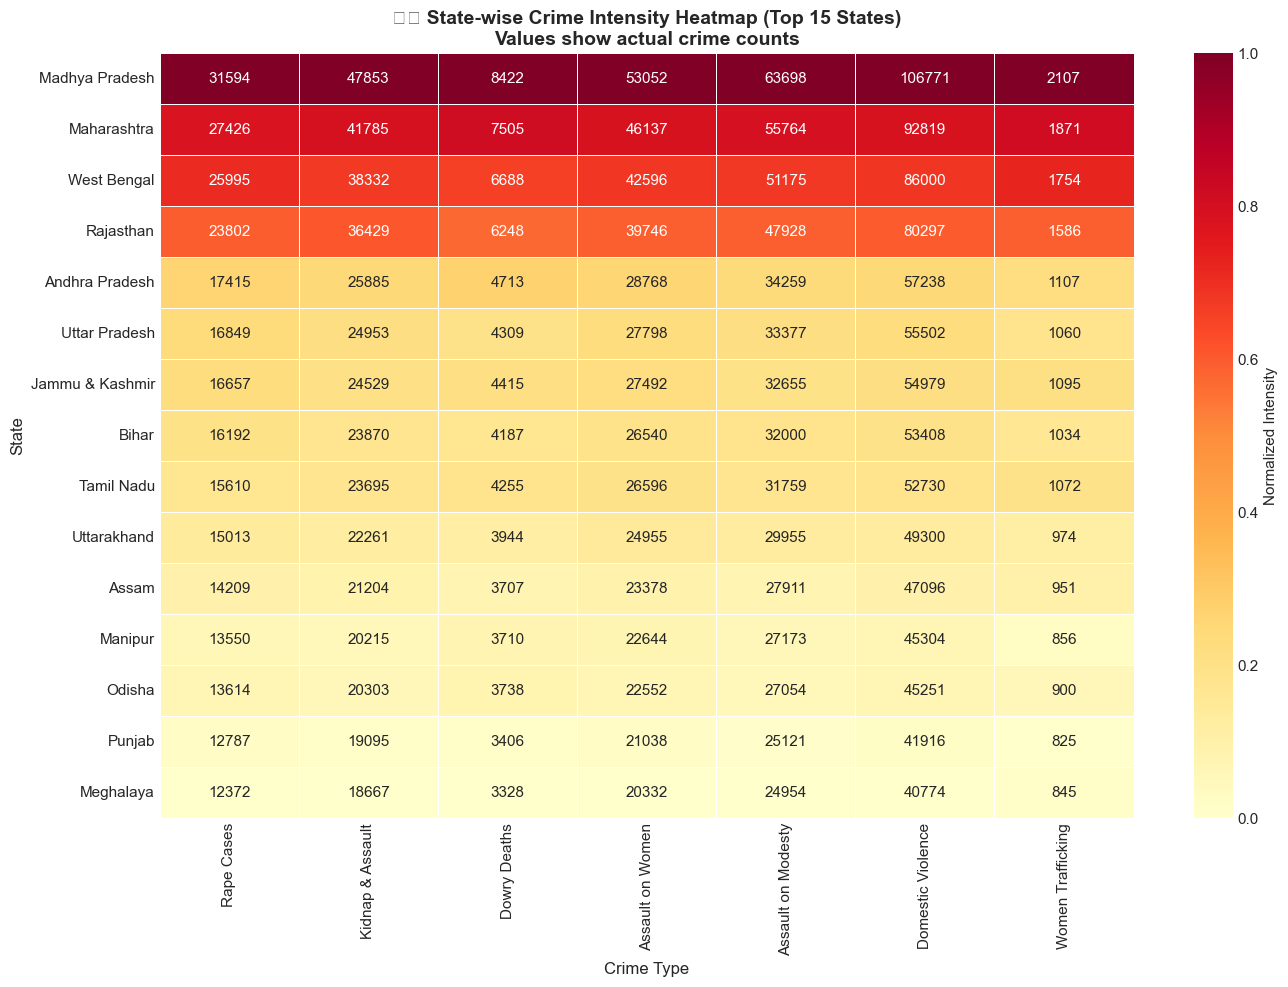

In [20]:
# State-wise Crime Intensity Heatmap (Top 15 States)
top_15_states = state_aggregated.nlargest(15, 'Total_Crime')
heatmap_data = top_15_states.set_index('State')[crime_columns]

# Normalize data for better visualization
from sklearn.preprocessing import MinMaxScaler
scaler_mm = MinMaxScaler()
heatmap_normalized = pd.DataFrame(
    scaler_mm.fit_transform(heatmap_data),
    index=heatmap_data.index,
    columns=heatmap_data.columns
)

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_normalized, annot=heatmap_data.round(0).astype(int), 
            fmt='d', cmap='YlOrRd', linewidths=0.5,
            xticklabels=[crime_labels.get(c, c) for c in crime_columns],
            cbar_kws={'label': 'Normalized Intensity'})

plt.title('🗺️ State-wise Crime Intensity Heatmap (Top 15 States)\nValues show actual crime counts', 
          fontsize=14, fontweight='bold')
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.savefig('state_crime_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

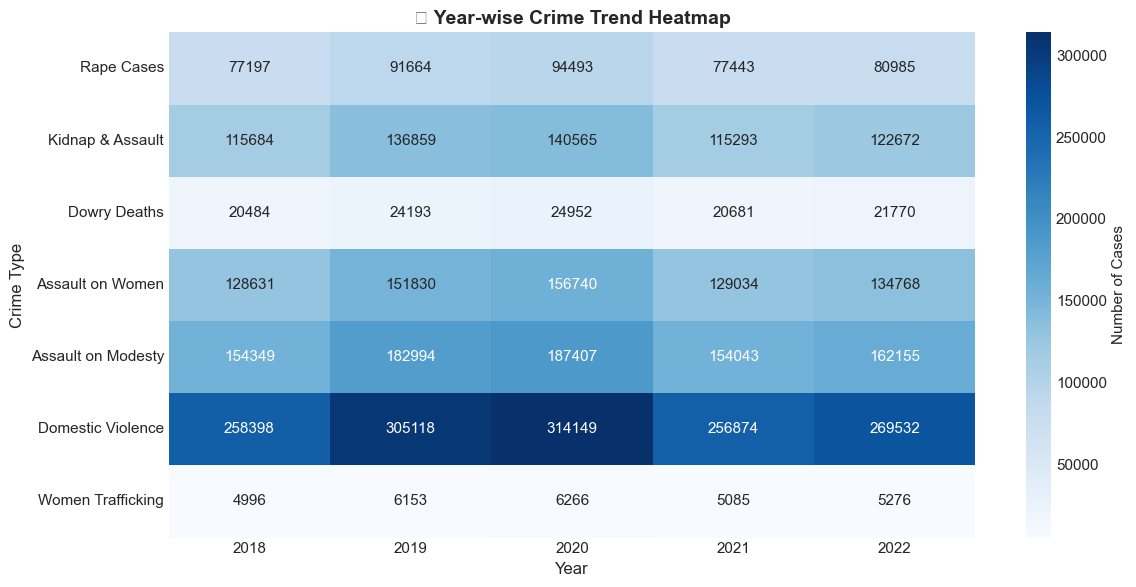

In [21]:
# Year-wise Crime Trend Heatmap
year_crime = df.groupby('Year')[crime_columns].sum()

plt.figure(figsize=(12, 6))
sns.heatmap(year_crime.T, annot=True, fmt='.0f', cmap='Blues',
            yticklabels=[crime_labels.get(c, c) for c in crime_columns],
            cbar_kws={'label': 'Number of Cases'})

plt.title('📅 Year-wise Crime Trend Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crime Type', fontsize=12)
plt.tight_layout()
plt.savefig('yearly_crime_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

### 📝 Interpretation: Heatmap Analysis

**Correlation Heatmap Insights:**
- High correlation between crime types may indicate common underlying factors (poverty, education gaps, etc.)
- Crimes that correlate highly might benefit from combined intervention strategies
- Low correlations suggest independent factors driving those crime types

**State-wise Intensity Heatmap:**
- Darker cells indicate higher crime counts for that state and crime type
- Helps identify which states need attention for specific crime types
- Visual pattern recognition helps in policy prioritization

## Section 8: Summary and Conclusions

In [22]:
# Final Summary Statistics
print("=" * 70)
print("📊 EXPLORATORY DATA ANALYSIS SUMMARY: CRIME AGAINST WOMEN")
print("=" * 70)

print("\n🔹 DATASET OVERVIEW:")
print(f"   • Total Records: {len(df):,}")
print(f"   • States Covered: {df['State'].nunique()}")
print(f"   • Time Period: {df['Year'].min()} - {df['Year'].max()}")
print(f"   • Crime Types Analyzed: {len(crime_columns)}")

print("\n🔹 TOP 5 STATES WITH HIGHEST CRIME:")
for i, row in state_aggregated.nlargest(5, 'Total_Crime').iterrows():
    print(f"   {row['State']}: {row['Total_Crime']:,} cases")

print("\n🔹 CRIME TYPE WITH HIGHEST CASES:")
total_by_crime = state_aggregated[crime_columns].sum().sort_values(ascending=False)
for crime, count in total_by_crime.head(3).items():
    print(f"   {crime_labels.get(crime, crime)}: {count:,} cases")

print("\n🔹 CLUSTERING RESULTS:")
for cluster in range(n_clusters):
    states_in_cluster = state_aggregated[state_aggregated['Cluster'] == cluster]['State'].tolist()
    avg_crime = state_aggregated[state_aggregated['Cluster'] == cluster]['Total_Crime'].mean()
    print(f"   Cluster {cluster}: {len(states_in_cluster)} states (Avg Crime: {avg_crime:,.0f})")

print("\n" + "=" * 70)
print("✅ Analysis Complete! Check saved visualizations:")
print("   • top_10_crime_states.png")
print("   • crime_trend_top_states.png")
print("   • crime_by_type_states.png")
print("   • crime_composition_stacked.png")
print("   • clustering_evaluation.png")
print("   • cluster_visualization.png")
print("   • cluster_radar_chart.png")
print("   • correlation_heatmap.png")
print("   • state_crime_heatmap.png")
print("   • yearly_crime_heatmap.png")
print("=" * 70)

📊 EXPLORATORY DATA ANALYSIS SUMMARY: CRIME AGAINST WOMEN

🔹 DATASET OVERVIEW:
   • Total Records: 150
   • States Covered: 30
   • Time Period: 2018 - 2022
   • Crime Types Analyzed: 7

🔹 TOP 5 STATES WITH HIGHEST CRIME:
   Madhya Pradesh: 313,497 cases
   Maharashtra: 273,307 cases
   West Bengal: 252,540 cases
   Rajasthan: 236,036 cases
   Andhra Pradesh: 169,385 cases

🔹 CRIME TYPE WITH HIGHEST CASES:
   Domestic Violence: 1,404,071 cases
   Assault on Modesty: 840,948 cases
   Assault on Women: 701,003 cases

🔹 CLUSTERING RESULTS:
   Cluster 0: 6 states (Avg Crime: 159,068)
   Cluster 1: 10 states (Avg Crime: 88,697)
   Cluster 2: 4 states (Avg Crime: 268,845)
   Cluster 3: 10 states (Avg Crime: 122,198)

✅ Analysis Complete! Check saved visualizations:
   • top_10_crime_states.png
   • crime_trend_top_states.png
   • crime_by_type_states.png
   • crime_composition_stacked.png
   • clustering_evaluation.png
   • cluster_visualization.png
   • cluster_radar_chart.png
   • correlati

## 📋 Final Conclusions

### Key Findings:

1. **States with Highest Crime Against Women:**
   - Large population states consistently report higher absolute numbers of crimes
   - This requires considering per-capita rates for fair comparison
   - Top states need intensive intervention programs

2. **Crime Type Analysis:**
   - Domestic Violence (DV) is the most prevalent crime type
   - Assault against Modesty (AoM) and Assault on Women (AoW) are also significant
   - Women Trafficking remains underreported but concerning

3. **State Clustering Insights:**
   - States naturally group into 4 distinct clusters based on crime patterns
   - High-crime cluster states share similar socio-economic challenges
   - Cluster-based policy design can be more effective

4. **Correlations:**
   - Strong correlations exist between certain crime types
   - Indicates common root causes that need addressing
   - Combined intervention strategies may be more effective

### Recommendations:
- Focus resources on high-crime cluster states
- Develop specific programs for dominant crime types in each region
- Improve reporting mechanisms for underreported crimes
- Use per-capita analysis for fairer state comparisons
- Implement awareness programs targeting correlated crime factors

---
**Note:** If using your own dataset, update the `crime_data_path` variable in cell 5 to point to your actual CSV file location.